>[imports](#scrollTo=HKBQVXGJGdtQ)

>[Loading the data and pre-processing steps](#scrollTo=oZR0TAxg-VPa)

>[task 1: Colorectal Cancer Classification Using CNNs](#scrollTo=8uYob-Isse53)

>[Task 1 - part a : implementing ResNet-50 architecture and training from the scratch](#scrollTo=eh_IZfxP_7lk)

>>[CNN Architecture](#scrollTo=icn8Jd0lw_9k)

>>[Model Training](#scrollTo=_9oO8yZX_ni5)

>>[Model Optimization by hyperparameter grid search](#scrollTo=BPa7Zg6l_tq7)

>>[Results for Task 1 - Part a](#scrollTo=gzU9gSrRAHd5)

>>>[Evaluation](#scrollTo=P4YdZpudBDPR)

>>>[Visualization with T-SNE](#scrollTo=qv4QJSI4BGdv)

>[Task 1 - part b :using a pre-trained network for  Clorectal Cancer Classification](#scrollTo=o48x2wqbAPMz)

>>[loading the Pre-trained Network](#scrollTo=frJPrbojsiEO)

>>[Fine-tuning for Colorectal Cancer Classification](#scrollTo=COk1y7WfBjtE)

>>[Results for Task 1 - part b](#scrollTo=q1EliJWnHjgo)

>>>[Evaluation](#scrollTo=zdp-oK9tHmlQ)

>>>[T-SNE Visualization](#scrollTo=1AJEvh4hHvPO)

>[Task 2](#scrollTo=pm1iOvJxKnkQ)

>>[using the CNN encoder trained in task 1](#scrollTo=cTthWn4-L7Am)

>>>[extracting features](#scrollTo=Ozx0fK9nxjx4)

>>>[t-SNE visualization](#scrollTo=2C0iKR6CMsyx)

>>>[training ML models to classify the extracted features](#scrollTo=CZRsYGUvNBBU)

>>>>[k-nearest neighbors clustering (unsupervised learning)](#scrollTo=728w9dqLNBBb)

>>>>[Random Forrest(Supervised Learning)](#scrollTo=Dn__1pN7NBBb)

>>[using pre-trained VGG16](#scrollTo=-ndQiJpPrJqm)

>>>[extracting features](#scrollTo=KIm9QphnMWVO)

>>>[t-SNE visualization](#scrollTo=JFk-td8EM1kC)

>>>>[k-nearest neighbors clustering (unsupervised learning)](#scrollTo=gUzxiZtlJoFS)

>>>[training ML models to classify the extracted features](#scrollTo=VgcnG4kGM1kC)

>>>>[Random Forrest(Supervised Learning)](#scrollTo=-11mr-0zJs_z)



# imports


In [5]:
import torch
from google.colab import drive
from torchvision import transforms
from torchvision.datasets import ImageFolder
import pickle
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


import os

# **Loading the data and pre-processing steps**

In [6]:

# Mount your Google Drive
drive.mount('/content/drive')

base_path = '/content/drive/My Drive/Comp6321 project dataset/'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

datasets = {}

dataset_names = ['Colorectal Cancer', 'Prostate Cancer', 'Animal Faces']

for dataset_name in dataset_names:
    dataset_path = base_path + dataset_name
    dataset = ImageFolder(root=dataset_path, transform=transform)
    datasets[dataset_name] = dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# **task 1: Colorectal Cancer Classification Using CNNs**


# Task 1 - part a : implementing ResNet-50 architecture and training from the scratch

## CNN Architecture





## Model Training

## Model Optimization by hyperparameter grid search

## Results for Task 1 - Part a

### Evaluation

In [21]:
def evaluate_classification_metrics(predictions, labels, loss,class_names):
    accuracy = accuracy_score(labels, predictions)

    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')

    report = classification_report(labels, predictions, target_names=class_names)

    confusion = confusion_matrix(labels, predictions)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Loss: {loss:.2f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(confusion)

    plt.figure(figsize=(8, 6))
    plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = range(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Visualization with T-SNE

# Task 1 - part b :using a pre-trained network for  Clorectal Cancer Classification

## loading the Pre-trained Network

In [ ]:

model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Fine-tuning for Colorectal Cancer Classification

In [ ]:


dataset = datasets['Colorectal Cancer']
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(dataset.classes)

In [ ]:

model.fc = nn.Linear(2048, num_classes)  # 2048 is the number of features in the ResNet-50 classifier
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

model.to(device)


In [ ]:

model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

num_classes = len(dataset.classes)
model.fc = nn.Linear(2048, num_classes)  # 2048 is the number of features in the ResNet-50 classifier


batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# lists to store losses and accuracy for plotting the learning curve
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = 100 * correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracy.append(epoch_train_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {epoch_train_loss}")
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Accuracy: {epoch_train_accuracy}%")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Training Loss: 0.4514469880859057
Epoch 1/10, Training Accuracy: 86.0%
Epoch 2/10, Training Loss: 0.24303825736045837
Epoch 2/10, Training Accuracy: 92.5625%
Epoch 3/10, Training Loss: 0.20883065780003865
Epoch 3/10, Training Accuracy: 93.08333333333333%
Epoch 4/10, Training Loss: 0.18813760466873647
Epoch 4/10, Training Accuracy: 93.83333333333333%
Epoch 5/10, Training Loss: 0.18049484319984913
Epoch 5/10, Training Accuracy: 93.85416666666667%
Epoch 6/10, Training Loss: 0.1666818544641137
Epoch 6/10, Training Accuracy: 94.39583333333333%
Epoch 7/10, Training Loss: 0.15764128401875496
Epoch 7/10, Training Accuracy: 94.47916666666667%
Epoch 8/10, Training Loss: 0.15083058118820192
Epoch 8/10, Training Accuracy: 94.875%
Epoch 9/10, Training Loss: 0.14661014071355263
Epoch 9/10, Training Accuracy: 94.72916666666667%
Epoch 10/10, Training Loss: 0.13941784719626107
Epoch 10/10, Training Accuracy: 95.33333333333333%


In [ ]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training Accuracy Curve')

plt.tight_layout()
plt.show()


In [ ]:

model_filename = base_path + 'dataset1_model_using_pretrained_resnet50.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)


In [ ]:

with open(model_filename, 'rb') as file:
    model = pickle.load(file)


## Results for Task 1 - part b

### Evaluation

Test Accuracy: 97.58%
Test Loss: 0.1014
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Loss: 0.10
Classification Report:
              precision    recall  f1-score   support

         MUS       0.96      0.98      0.97       385
        NORM       0.99      0.99      0.99       410
         STR       0.97      0.96      0.97       405

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200

Confusion Matrix:
[[377   2   6]
 [  1 405   4]
 [ 15   1 389]]


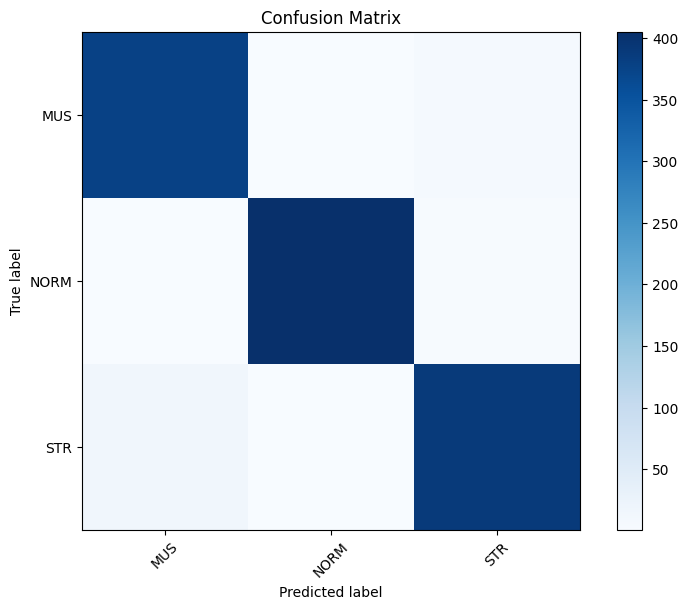

In [ ]:

# Testing loop
model.eval()
correct_test = 0
total_test = 0
test_loss = 0.0
predictions = []
labels = []

with torch.no_grad():
    for inputs, ground_truth in test_loader:
        inputs, ground_truth = inputs.to(device), ground_truth.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, ground_truth)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_test += ground_truth.size(0)
        correct_test += (predicted == ground_truth).sum().item()
        predictions.extend(predicted.cpu().numpy())
        labels.extend(ground_truth.cpu().numpy())

test_accuracy = 100 * correct_test / total_test
test_loss /= len(test_loader)

print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

class_names = dataset.classes

evaluate_classification_metrics(predictions, labels, test_loss,class_names)

In [ ]:
#todo : learning curve?

### T-SNE Visualization

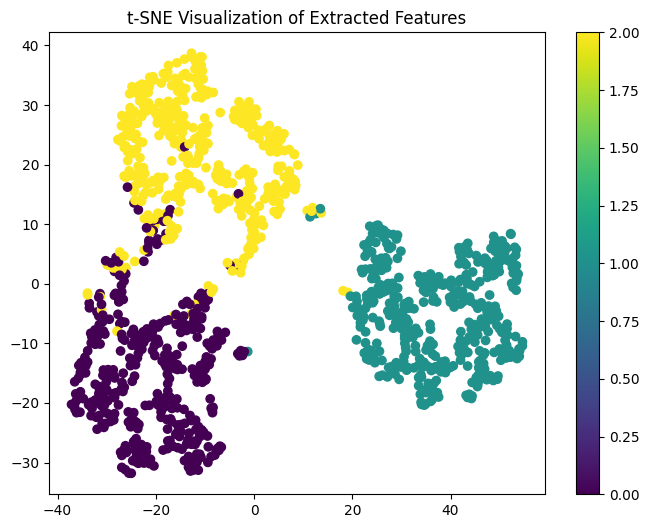

In [ ]:

model.eval()
all_features = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        features = model(inputs).cpu().numpy()
        all_features.append(features)
        all_labels.append(labels.cpu().numpy())

all_features = np.vstack(all_features)
all_labels = np.concatenate(all_labels)

tsne = TSNE(n_components=2, random_state=0)
reduced_features = tsne.fit_transform(all_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=all_labels, cmap='viridis')
plt.title('t-SNE Visualization of Extracted Features')
plt.colorbar()
plt.show()


# **Task 2**

## using the CNN encoder trained in task 1

### extracting features


###  t-SNE visualization

###  training ML models to classify the extracted features

#### k-nearest neighbors clustering (unsupervised learning)

#### Random Forrest(Supervised Learning)

## using pre-trained VGG16

### extracting features  

note: we run the following cell once and store the features in drive, and after that we can load them from the drive.

In [81]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pretrained_model = models.vgg16(pretrained=True).to(device)
feature_extractor = nn.Sequential(*list(pretrained_model.features.children())).to(device)  # Remove the last layer

# Define data transformations for normalization to ImageNet
normalize_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

d2_batch_size = 32
d3_batch_size = 32

prostate_data_loader = DataLoader(datasets['Prostate Cancer'], batch_size=d2_batch_size, shuffle=True)
animal_faces_data_loader = DataLoader(datasets['Animal Faces'], batch_size=d3_batch_size, shuffle=True)

prostate_pbar = tqdm(total=len(prostate_data_loader), desc="Prostate Features")
animal_faces_pbar = tqdm(total=len(animal_faces_data_loader), desc="Animal Faces Features")

# Create datasets for feature vectors and targets
prostate_data = []
animal_faces_data = []

for data_loader, pbar, feature_dataset in [(prostate_data_loader, prostate_pbar, prostate_data), (animal_faces_data_loader, animal_faces_pbar, animal_faces_data)]:
    feature_extractor.eval()  # Set the feature extractor to evaluation mode
    with torch.no_grad():
        for images, targets in data_loader:
            # Move images to the GPU
            images = images.to(device)
            # Apply ImageNet normalization to the images before feature extraction
            images = normalize_transform(images)
            features = feature_extractor(images)
            features = features.view(features.size(0), -1).cpu().numpy()
            feature_targets = list(zip(features, targets))
            feature_dataset.extend(feature_targets)
            pbar.update(1)  # Update the progress bar
prostate_pbar.close()
animal_faces_pbar.close()



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Animal Faces Features: 100%|██████████| 188/188 [02:21<00:00,  1.33it/s]


In [82]:


shared_folder_path = base_path

# Save the custom datasets (features and targets) using pickle
prostate_data_file = os.path.join(shared_folder_path, 'prostate_data.pkl')
with open(prostate_data_file, 'wb') as file:
    pickle.dump(prostate_data, file)

animal_faces_data_file = os.path.join(shared_folder_path, 'animal_faces_data.pkl')
with open(animal_faces_data_file, 'wb') as file:
    pickle.dump(animal_faces_data, file)


In [9]:
shared_folder_path = base_path
prostate_data_file = os.path.join(shared_folder_path, 'prostate_data.pkl')
animal_faces_data_file = os.path.join(shared_folder_path, 'animal_faces_data.pkl')

animal_faces_data_file = os.path.join(shared_folder_path, 'animal_faces_data.pkl')

with open(prostate_data_file, 'rb') as file:
    prostate_data = pickle.load(file)

with open(animal_faces_data_file, 'rb') as file:
    animal_faces_data = pickle.load(file)


###  t-SNE visualization

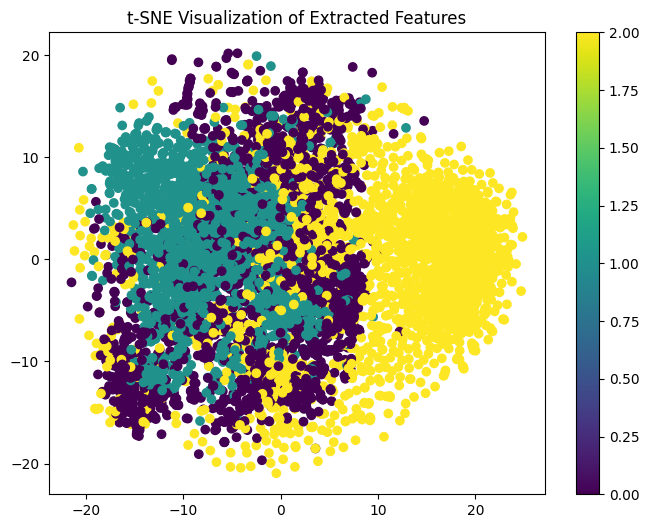

In [17]:
prostate_features, prostate_labels = zip(*prostate_data)

prostate_labels = [label.numpy() for label in prostate_labels]

prostate_features = np.vstack(prostate_features)

tsne = TSNE(n_components=2, random_state=0)
reduced_features = tsne.fit_transform(prostate_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=prostate_labels, cmap='viridis')
plt.title('t-SNE Visualization of Extracted Features from vgg16 encoder (Prostate Cancer)')
plt.colorbar()
plt.show()


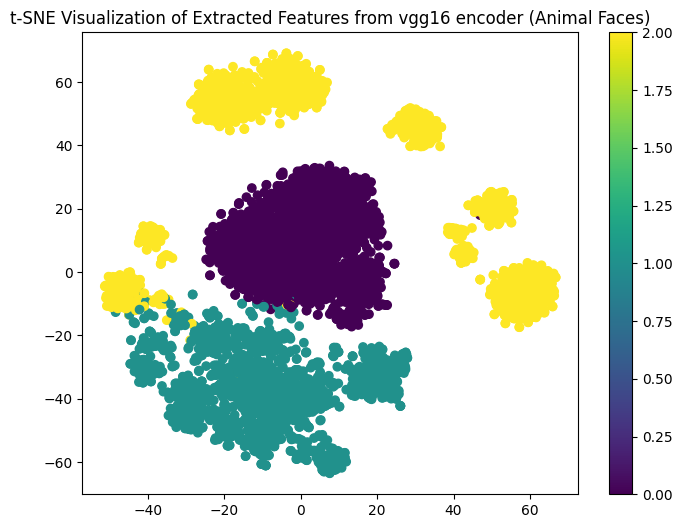

In [18]:
animal_features, animal_labels = zip(*animal_faces_data)

animal_labels = [label.numpy() for label in animal_labels]

animal_features = np.vstack(animal_features)

tsne = TSNE(n_components=2, random_state=0)
reduced_features = tsne.fit_transform(animal_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=animal_labels, cmap='viridis')
plt.title('t-SNE Visualization of Extracted Features from vgg16 encoder (Animal Faces)')
plt.colorbar()
plt.show()
